In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import lmfit
import corner

In [14]:
def Hz1(z1,H01,Om1,b):
    E1=np.sqrt(((Om1*(1+z1)**3.) + (1-Om1))**b)
    E = np.sqrt((Om1*(1+z1)**3.) + (1-Om1)*E1)
    HZ1 = H01*E
    return HZ1

In [15]:
#Define  random redshifts
num_zs = 1000
zs= np.linspace(0.01, 10., num=num_zs)

In [16]:
O_m=0.228
b=0.508
H_0=68.


In [17]:
#Hubble comoving parameter
Hz=Hz1(zs,H_0,O_m,b,)/(1+zs)

In [18]:
#random error for Hz
error_sigma = 0.5
e1 = np.random.normal(0., error_sigma, Hz.shape)

In [19]:
H_zz= Hz + e1

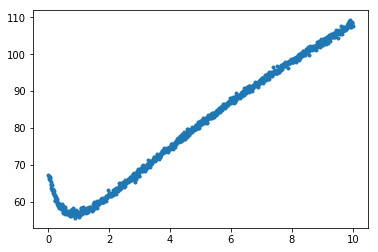

In [20]:
plt.plot(zs,H_zz, '.')

In [21]:
p = lmfit.Parameters()
p.add_many(('Om1',0.2,True,0.,2.),
           ('H01',70.,True,50.,100.),
           ('b',0.5,True,-1.,1))

def residual(p):
    v = p.valuesdict()
    return (Hz1(zs,v['H01'],v['Om1'],v['b'])/(1+zs)-H_zz)/error_sigma

In [22]:
mi = lmfit.minimize(residual, p, method='leastsq', nan_policy='omit')

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 1000
    # variables        = 3
    chi-square         = 978.243726
    reduced chi-square = 0.98118729
    Akaike info crit   = -15.9964317
    Bayesian info crit = -1.27316583
[[Variables]]
    Om1:  0.22816935 +/- 6.0294e-04 (0.26%) (init = 0.2)
    H01:  67.9727241 +/- 0.09569461 (0.14%) (init = 70)
    b:    0.50975478 +/- 0.00992472 (1.95%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(Om1, H01) = -0.963
    C(H01, b)   = -0.598
    C(Om1, b)   =  0.401


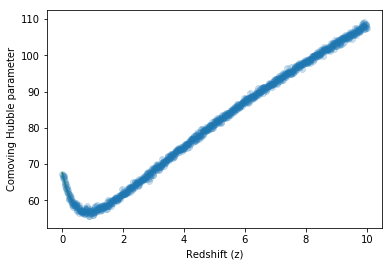

In [23]:
plt.errorbar(zs,H_zz,yerr=error_sigma,fmt='o',alpha=0.2)
#bestOde1= mi.params.valuesdict()['Ode1']
bestOm1 = mi.params.valuesdict()['Om1']
bestH01 = mi.params.valuesdict()['H01']
bestb = mi.params.valuesdict()['b']
plt.plot(zs,Hz1(zs,bestH01,bestOm1,bestb)/(1+zs))
plt.plot(zs,Hz)
plt.xlabel('Redshift (z)')
plt.ylabel('Comoving Hubble parameter')
lmfit.report_fit(mi)

In [24]:
res = lmfit.minimize(residual, method='emcee', nan_policy='omit', burn=300, steps=1500, thin=1,
                         params=p, is_weighted=True)

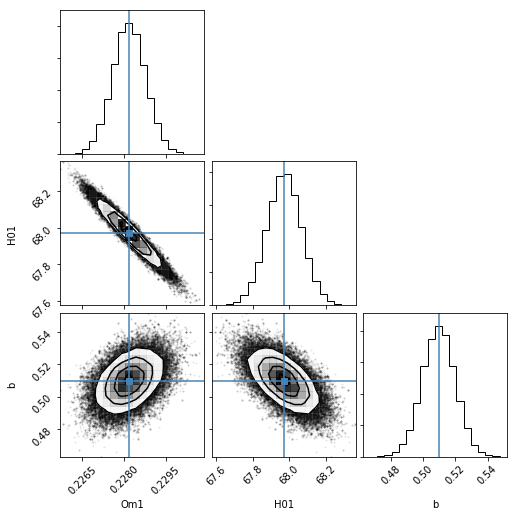

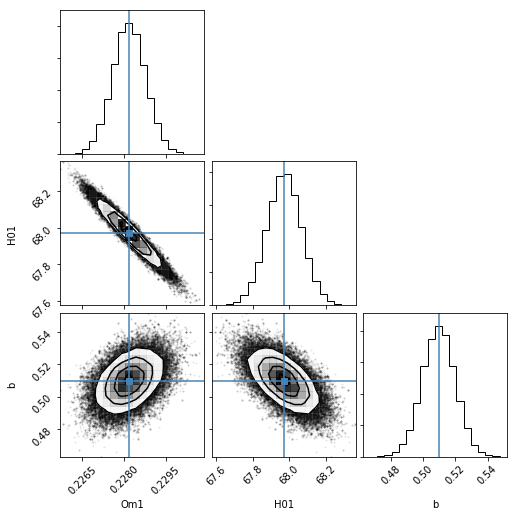

In [25]:
corner.corner(res.flatchain,labels=res.var_names, truths=list(res.params.valuesdict().values()))